 Retail_Sales_Data_Analysis
1. Problem Statement
This Project Analyze Retail Sales Data to identify:
-Top Performing Categories
-Most profitable products
-City wise sales performance
-Monthly Trends
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Business Insights
5. Conclusion

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [222]:
df = pd.read_csv("Retail_Sales_Small_Dataset.csv")
df


,Order_ID,Date,Product,Category,Sales,Profit,City
0,1,16-04-2024,Phone,Technology,20795,4005.27,Kolkata
1,2,15-03-2024,Tablet,Technology,59886,6999.17,Delhi
2,3,10-05-2024,Tablet,Technology,49131,3509.43,Kolkata
3,4,28-03-2024,Smartwatch,Accessories,72221,4222.17,Bangalore
4,5,09-05-2024,Smartwatch,Accessories,67955,12964.65,Chennai
5,6,09-06-2024,Laptop,Technology,10311,2050.15,Mumbai
6,7,29-03-2024,Smartwatch,Accessories,58707,8321.60,Kolkata
7,8,15-01-2024,Headphones,Accessories,30658,3371.74,Kolkata
8,9,20-02-2024,Tablet,Technology,70725,4497.47,Delhi
9,10,04-03-2024,Smartwatch,Accessories,72435,9209.04,Chennai


In [223]:
# To see first five rows of the data
df.head()

,Order_ID,Date,Product,Category,Sales,Profit,City
0,1,16-04-2024,Phone,Technology,20795,4005.27,Kolkata
1,2,15-03-2024,Tablet,Technology,59886,6999.17,Delhi
2,3,10-05-2024,Tablet,Technology,49131,3509.43,Kolkata
3,4,28-03-2024,Smartwatch,Accessories,72221,4222.17,Bangalore
4,5,09-05-2024,Smartwatch,Accessories,67955,12964.65,Chennai


In [224]:
# To know the number of rows and columns in data.
df.shape   #(30 Rows, 7 columns)

(30, 7)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order_ID  30 non-null     int64  
 1   Date      30 non-null     object 
 2   Product   30 non-null     object 
 3   Category  30 non-null     object 
 4   Sales     30 non-null     int64  
 5   Profit    30 non-null     float64
 6   City      30 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ KB


In [226]:
df.describe()

,Order_ID,Sales,Profit
count,30.000000,30.000000,30.000000
mean,15.500000,45279.266667,5491.294667
std,8.803408,22529.666597,3067.294076
min,1.000000,10258.000000,818.860000
25%,8.250000,25404.500000,3242.665000
50%,15.500000,46395.500000,4502.660000
75%,22.750000,65665.500000,8019.922500
max,30.000000,78969.000000,12964.650000


In [227]:
# Missing values 
df.isnull().sum()

Order_ID    0
Date        0
Product     0
Category    0
Sales       0
Profit      0
City        0
dtype: int64

In [257]:
# Data Cleaning
#  Convert Date to Date time format
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
df["Month"] = df["Date"].dt.month 
df['Month'] = df['Date'].dt.month_name()



Category
Accessories    594212
Technology     764166
Name: Sales, dtype: int64


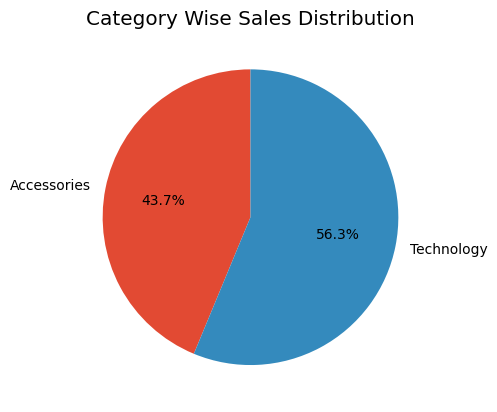

In [ ]:
category_sales = df.groupby("Category")["Sales"].sum()
print(category_sales)

# Category wise highest sale:
plt.pie(category_sales,labels=category_sales.index,autopct="%1.1f%%",startangle=90)
plt.title("Category Wise Sales Distribution")
plt.show()


The highest sales was done by Technology.

Category
Accessories    76367.51
Technology     88371.33
Name: Profit, dtype: float64


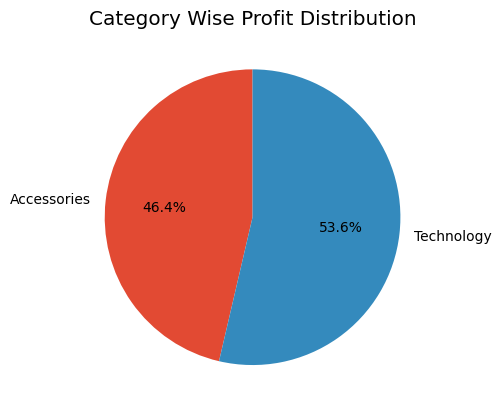

In [ ]:
category_profit = df.groupby("Category")["Profit"].sum()
print(category_profit)

# Category wise highest Profit:
plt.pie(category_profit,labels=category_profit.index,autopct="%1.1f%%",startangle=90)
plt.title("Category Wise Profit Distribution")
plt.show()

The highest profit was done by technology

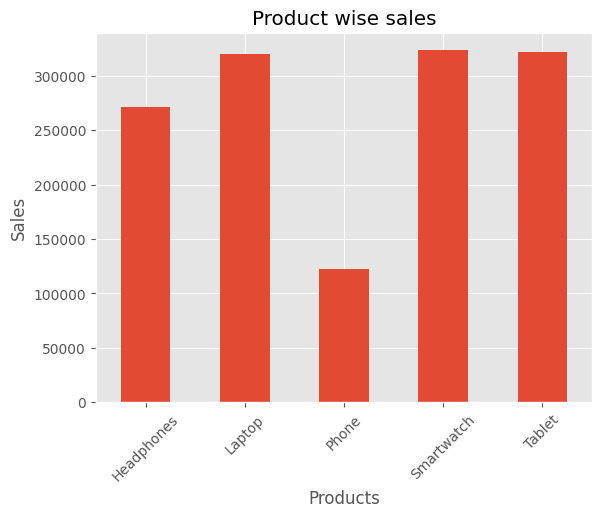

In [234]:
product_sales = df.groupby("Product",as_index=False)["Sales"].sum().sort_values(by="Sales" ,ascending=False)
product_sales

# Products wise sales
product_sales = df.groupby('Product')['Sales'].sum()

product_sales.plot(kind="bar")
plt.title("Product wise sales")
plt.xlabel("Products")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

Smartwatch was highly selling product

City
Kolkata      407127
Chennai      348037
Bangalore    311348
Delhi        210036
Mumbai        81830
Name: Sales, dtype: int64


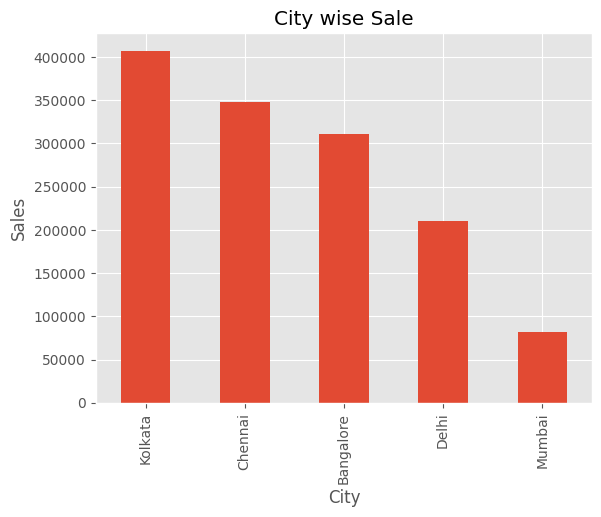

In [260]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)
print(city_sales)

# City wise Sales

city_sales.plot(kind = "bar")
plt.title("City wise Sale")
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()

Kolkata recorded the highest total sale among all the cities.

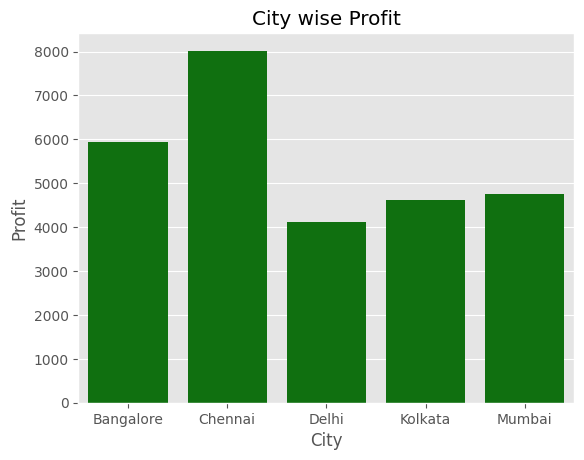

In [259]:
city_profit = df.groupby("City",as_index=False)["Profit"].mean()
city_profit

# Which city generates the highest profit?
sns.barplot(data=city_profit,x="City",y="Profit",color="Green")
plt.title("City wise Profit")

plt.show()

Month
April       163110
February    176448
January     152177
June         10311
March       564089
May         292243
Name: Sales, dtype: int64


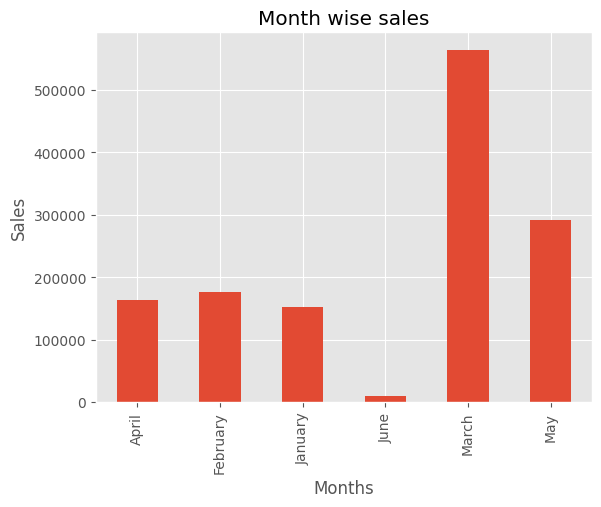

In [ ]:
monthly_sales = df.groupby("Month")["Sales"].sum()
print(monthly_sales)

# Month wise Sale:
monthly_sales.plot(kind="bar")
plt.title("Month wise sales")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

March recorded as the highest selling month.

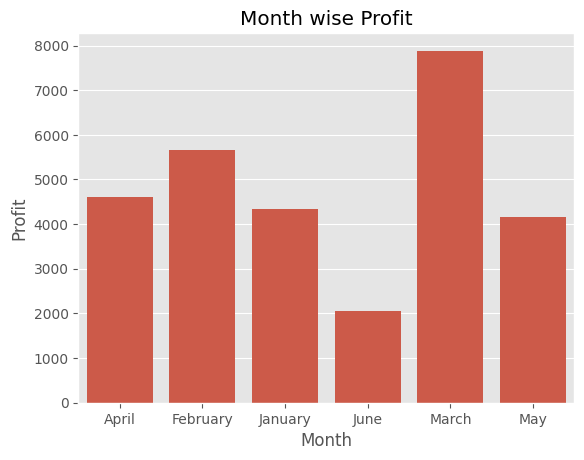

In [ ]:
monthly_profit = df.groupby("Month", as_index=False)["Profit"].mean()

# Month wise Profit
sns.barplot(data=monthly_profit, x="Month", y="Profit")
plt.title("Month wise Profit")
plt.show()

March is recorded as the highest proftable month.

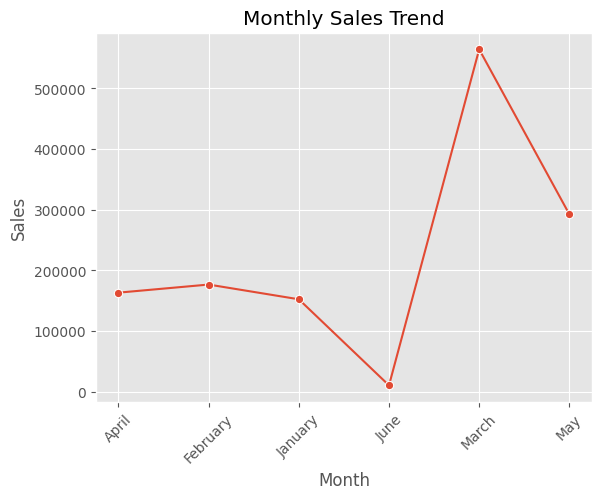

In [ ]:
# Month wise sales trend:
monthly_sales = df.groupby("Month", as_index=False)["Sales"].sum()

sns.lineplot(data=monthly_sales, x="Month", y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

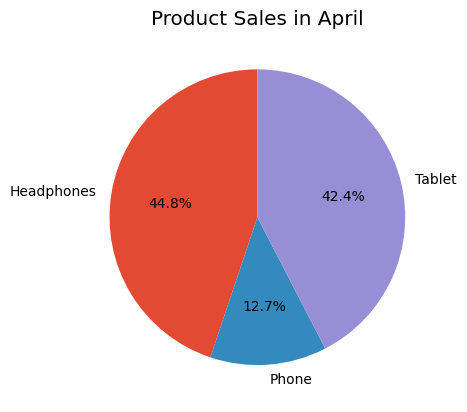

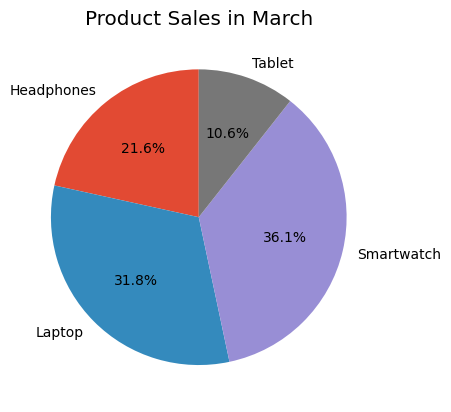

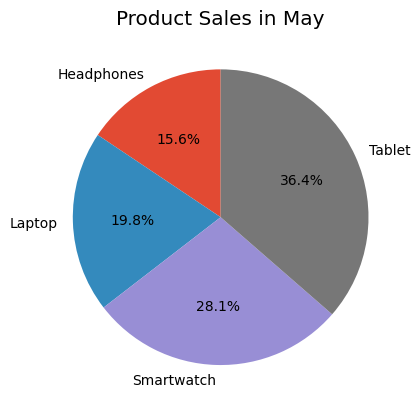

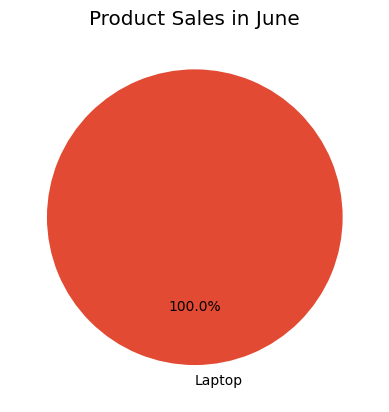

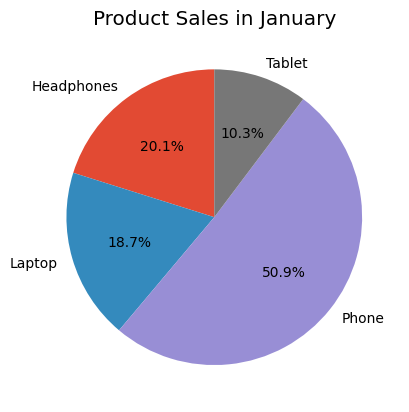

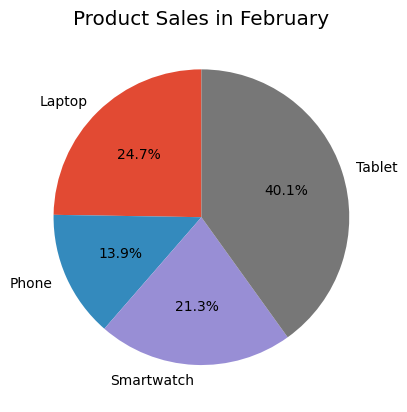

In [261]:
# Representing products sold in each month with the help of pie chart.
months = df['Month'].unique()
for month in months:
    month_data = df[df['Month'] == month]
    product_sales = month_data.groupby('Product')['Sales'].sum()
    plt.figure()
    plt.pie(product_sales,
            labels=product_sales.index,
            autopct="%1.1f%%",
            startangle=90)
    
    plt.title(f"Product Sales in {month}")
    plt.show()

Months              Highest Selling Product
January             Phone
February            Tablet
March               Smartwatch
April               Headphones
May                 Tablet
June                Laptop

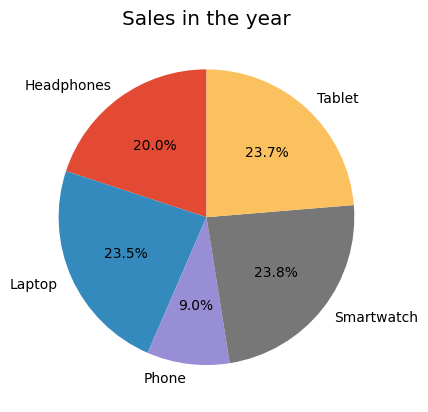

In [ ]:
# Highest selling product in the whole year:
Highest_selling_product = df.groupby("Product",as_index=False)["Sales"].sum()
Highest_selling_product

labels = ["Headphones","Laptop","Phone","Smartwatch","Tablet"]
Sales = [271020,319713,122661,323192,321792]
plt.pie(Sales,labels=labels,autopct="%1.1f%%", 
        startangle=90)
plt.title("Sales in the year")
plt.show()


The highest selling product of the year is Smartwatch.

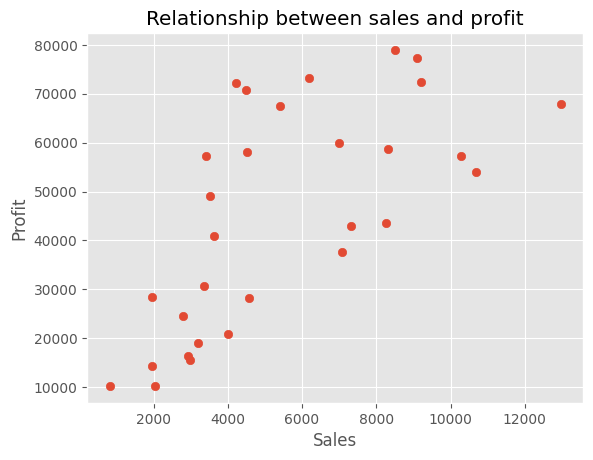

In [ ]:
# Showing Relation between profit and sales using scatter plot:
plt.scatter(df["Profit"],df["Sales"])
plt.title("Relationship between sales and profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

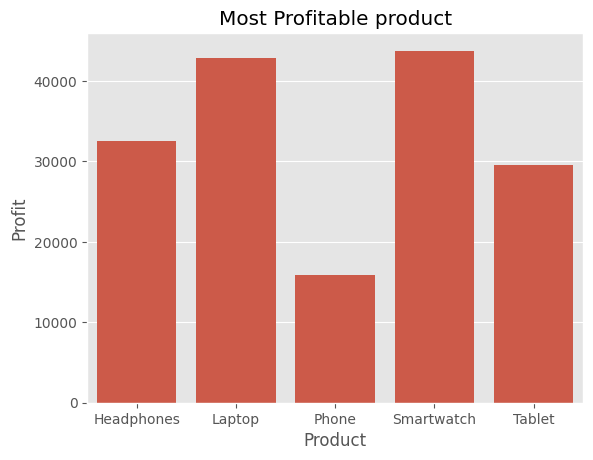

In [ ]:
# Finding the most profitable product
profitable_product = df.groupby("Product",as_index=False)["Profit"].sum()
profitable_product

sns.barplot(profitable_product,x="Product",y="Profit")
plt.title("Most Profitable product")
plt.show()

The most profitable product is smartwatch.

Conclusion:
This sales and profit Analysis project identified.
1. Smartwatch as the company's strongest performing product.
2. Tablet showed consistent monthly dominance.
3. March recorded as the highest overall sales.
4. Kolkata generated the highest sales.
5. Chennai emerged as the most profitable City.

